In [6]:
import pandas as pd
import os
os.chdir("C:\\Users\\Zber\\Documents\\Dev_program\\OpenRadar")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.manifold import TSNE
from matplotlib.lines import Line2D
from sklearn.metrics.pairwise import paired_distances
from sklearn.metrics import silhouette_samples, silhouette_score

In [7]:
def min_max(X):
    mmm = np.max(X)
    mm = np.min(X)
    X_std = (X - mm) / (mmm - mm)
    return X_std

In [8]:
def get_medoid(data):
    # get mean
    mean = np.mean(data, axis=0)
    means = np.asarray([mean] * len(data))
    idx = np.argmin(paired_distances(data, means))
    medoid = data[idx]
    return medoid
    

In [9]:
res_dir = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results/Ours_TSNE_1_20220624-161251"
# res_dir = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results/Ours_TSNE_20220624-160748"
imag_path =os.path.join(res_dir, 'image.npy')
kd_path =os.path.join(res_dir, 'kd.npy')
imag = np.load(imag_path)
kd = np.load(kd_path)
label_path = os.path.join(res_dir, 'labels.npy')
labels = np.load(label_path)


un_dir = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results/Baseline3_TSNE_20220710-175756"
un_path = os.path.join(res_dir, 'kd.npy')
kd = np.load(un_path)

In [10]:
all_data = np.concatenate((imag, kd))
X_tsne = TSNE(n_components=2, random_state=33).fit_transform(all_data)
X_tsne[:, 0] = min_max(X_tsne[:, 0])
X_tsne[:, 1] = min_max(X_tsne[:, 1])

c:\Users\Zber\anaconda3\envs\Emo\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\Zber\anaconda3\envs\Emo\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [11]:
X_tsne_image = X_tsne[:len(X_tsne)//2,:]
X_tsne_kd = X_tsne[len(X_tsne)//2:,:]

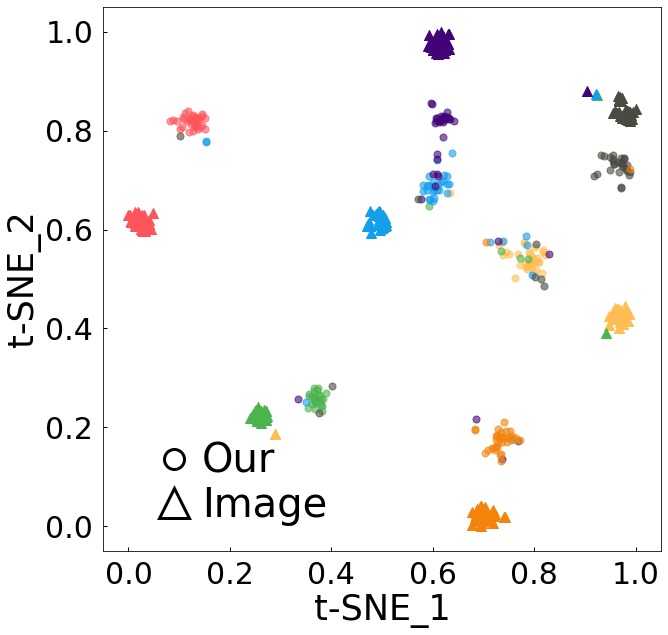

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

markers = ["o", "^"]

colors = ["#FF545A","#FFBE54",'#4CB44C',"#149FEB","#420278","#494a41", "#F4820B"] #"#F4820B"

ll =["Our", "Image"]

ms = 50

for s in range(0, 7):
    sub_index = (labels == s)
    ax.scatter(X_tsne_image[sub_index, 0], X_tsne_image[sub_index, 1], marker=markers[1], c=colors[s], s=ms * 2)

    ax.scatter(X_tsne_kd[sub_index, 0], X_tsne_kd[sub_index, 1], marker=markers[0],c = colors[s], s=ms, zorder= 20, alpha=.6)



legend_s = [Line2D([0], [0], marker=m, color='w', mew=3, markerfacecolor=None, markeredgecolor='black', label=ll[s],
                markersize=15) for m, s in zip(markers, range(0, 2))]



ax.set_ylabel("t-SNE_2", fontsize=35)
ax.set_xlabel("t-SNE_1", fontsize=35)

ax.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)
ax.yaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)

# ax.xaxis.labelpad = 4
# ax.yaxis.labelpad = 4
l = ax.legend(handles=legend_s, loc="lower center", prop={'size': 40, }, ncol=1, bbox_to_anchor=(.25, -0.02),
                    fancybox=True, framealpha=0.0, labelspacing=0.1, handletextpad=0.3, columnspacing=0.3, handlelength=0.8)

# ax.set_xticks([])
# ax.set_yticks([])
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
# ax.add_artist(legend1)
# ax.add_artist(legend2)
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/kd_image_tsne.pdf', format='pdf', bbox_inches="tight")
l.legendHandles[0]._legmarker.set_markersize(20)
l.legendHandles[1]._legmarker.set_markersize(30)
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/m2_4.svg', format='svg', bbox_inches="tight")

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(all_data)
X_pca_image = X_pca[:len(X_pca)//2,:]
X_pca_kd = X_pca[len(X_pca)//2:,:]


In [14]:
X_pca_kd = pca.fit_transform(kd)

In [10]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_pca_image = pca.fit_transform(imag)
# X_pca_kd = pca.fit_transform(kd)

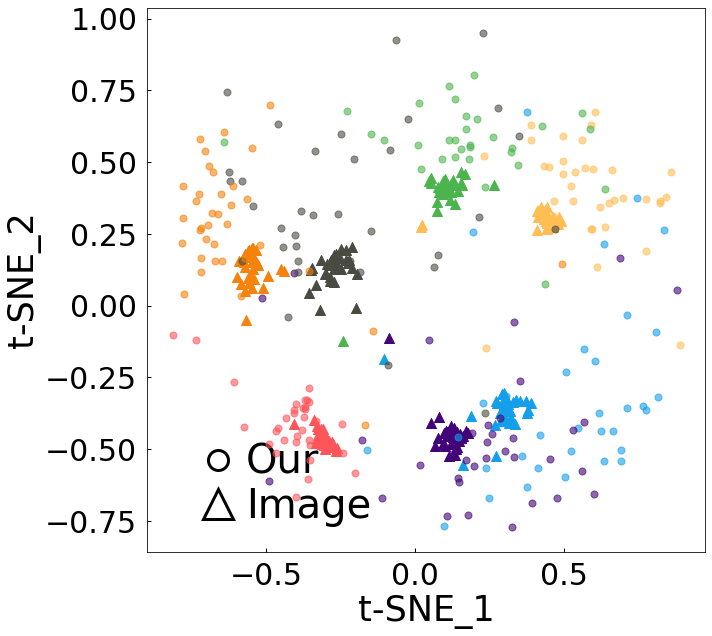

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

markers = ["o", "^"]

colors = ["#FF545A","#FFBE54",'#4CB44C',"#149FEB","#420278","#494a41", "#F4820B"] #"#F4820B"

ll =["Our", "Image"]

ms = 50

for s in range(0, 7):
    sub_index = (labels == s)
    ax.scatter(X_pca_image[sub_index, 0], X_pca_image[sub_index, 1], marker=markers[1], c=colors[s], s=ms * 2)

    ax.scatter(X_pca_kd[sub_index, 0], X_pca_kd[sub_index, 1], marker=markers[0],c = colors[s], s=ms, zorder= 20, alpha=.6)



legend_s = [Line2D([0], [0], marker=m, color='w', mew=3, markerfacecolor=None, markeredgecolor='black', label=ll[s],
                markersize=15) for m, s in zip(markers, range(0, 2))]



ax.set_ylabel("t-SNE_2", fontsize=35)
ax.set_xlabel("t-SNE_1", fontsize=35)

ax.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)
ax.yaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)

# ax.xaxis.labelpad = 4
# ax.yaxis.labelpad = 4
l = ax.legend(handles=legend_s, loc="lower center", prop={'size': 40, }, ncol=1, bbox_to_anchor=(.25, -0.02),
                    fancybox=True, framealpha=0.0, labelspacing=0.1, handletextpad=0.3, columnspacing=0.3, handlelength=0.8)

# ax.set_xticks([])
# ax.set_yticks([])
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
# ax.add_artist(legend1)
# ax.add_artist(legend2)
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/kd_image_tsne.pdf', format='pdf', bbox_inches="tight")
l.legendHandles[0]._legmarker.set_markersize(20)
l.legendHandles[1]._legmarker.set_markersize(30)

In [33]:
# calculate centroid for each class
imag_centroids = []
for s in range(0, 7):
    sub_index = (labels == s)
    cen = np.mean(X_tsne_image[sub_index], axis=0)
    imag_centroids.append(cen)


In [34]:
# calculate centroid for each class
our_centroids = []
for s in range(0, 7):
    sub_index = (labels == s)
    cen = np.mean(X_tsne_kd[sub_index], axis=0)
    our_centroids.append(cen)

In [69]:
# calculate centroid for each class
imag_medoid = []
for s in range(0, 7):
    sub_index = (labels == s)
    cen = get_medoid(X_pca_image[sub_index])
    imag_medoid.append(cen)

In [17]:
# calculate centroid for each class
our_medoid = []
for s in range(0, 7):
    sub_index = (labels == s)
    cen = get_medoid(X_pca_kd[sub_index])
    our_medoid.append(cen)

In [37]:
from sklearn.metrics.pairwise import paired_distances
pdist = paired_distances(imag_centroids, our_centroids)
pdist_m = paired_distances(imag_medoid, our_medoid)
print(pdist)
print(pdist_m)

[0.22643065 0.19814168 0.13265826 0.09792948 0.23719254 0.20819044
 0.18172726]
[0.2243899  0.21052292 0.12341934 0.0941935  0.2241702  0.14439051
 0.17652377]


In [57]:
print(np.mod(np.arange(7), 3))

[0 1 2 0 1 2 0]


In [71]:
ddist = []
for i in range(7):
    mm = np.asarray([our_medoid[i]] * 7)
    dist = paired_distances(mm, our_medoid)
    ddist.append(np.mean(dist))

print(ddist)

[0.78693694, 0.7472032, 0.7208831, 0.69491565, 0.7151455, 0.59665686, 0.74576664]


In [72]:
ddist = []
for i in range(7):
    mm = np.asarray([imag_medoid[i]] * 7)
    dist = paired_distances(mm, imag_medoid)
    ddist.append(np.mean(dist))

print(ddist)

[0.6060365, 0.65011424, 0.57981735, 0.5701012, 0.54260385, 0.49578214, 0.63147366]


In [73]:
inner_dsit = []
for s in range(0, 7):
    sub_index = (labels == s)
    sub_data = X_pca_kd[sub_index]
    sub_centroid = get_medoid(sub_data)
    sub_dist = []
    for data in sub_data:
        sub_dist.append(np.linalg.norm((data-sub_centroid)))
    inner_dsit.append(np.mean(sub_dist))
print(inner_dsit)

[0.1250234, 0.20633757, 0.21008575, 0.37660676, 0.3050667, 0.36848816, 0.23403038]


In [74]:
inner_dsit = []
for s in range(0, 7):
    sub_index = (labels == s)
    sub_data = X_pca_image[sub_index]
    sub_centroid = get_medoid(sub_data)
    sub_dist = []
    for data in sub_data:
        sub_dist.append(np.linalg.norm((data-sub_centroid)))
    inner_dsit.append(np.mean(sub_dist))
print(inner_dsit)

[0.03015995, 0.057670075, 0.063411854, 0.06811954, 0.04953781, 0.053368185, 0.05260416]


In [10]:
inner_dsit = []
for s in range(0, 7):
    sub_index = (labels == s)
    sub_data = X_tsne_kd[sub_index]
    sub_centroid = np.mean(X_tsne_image[sub_index], axis=0)
    sub_dist = []
    for data in sub_data:
        sub_dist.append(np.linalg.norm((data-sub_centroid)))
    inner_dsit.append(np.mean(sub_dist))
    
    


In [24]:
inner_dsit_imag = []
for s in range(0, 7):
    sub_index = (labels == s)
    sub_data = X_tsne_image[sub_index]
    sub_centroid = get_medoid(sub_data)
    sub_dist = []
    for data in sub_data:
        sub_dist.append(np.linalg.norm((data-sub_centroid)))
    inner_dsit_imag.append(np.mean(sub_dist))

In [26]:
inner_dsit

[0.017122537,
 0.032295775,
 0.0926786,
 0.09604539,
 0.1316735,
 0.15331118,
 0.055228475]

In [27]:
inner_dsit_imag

[0.01684532,
 0.06942139,
 0.06768406,
 0.033337463,
 0.0252564,
 0.016306909,
 0.017131949]

In [32]:
silhouette_avg = silhouette_score(X_pca_image, labels)
sample_silhouette_values = silhouette_samples(X_pca_image, labels)
mm = []
for i in range(0, 7):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    mean_value = np.mean(ith_cluster_silhouette_values)
    mm.append(mean_value)
print(mm)

[0.9002371, 0.75488144, 0.7042448, 0.5286966, 0.69267374, 0.7186437, 0.7337955]


In [18]:
silhouette_avg = silhouette_score(X_pca_kd, labels)
sample_silhouette_values = silhouette_samples(X_pca_kd, labels)
mm= []
for i in range(0, 7):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    mean_value = np.mean(ith_cluster_silhouette_values)
    mm.append(mean_value)
print(mm)

[0.6985147, 0.38075477, 0.2572334, -0.06282681, 0.034902457, -0.22179835, 0.37535214]


In [16]:
silhouette_avg

0.72000754

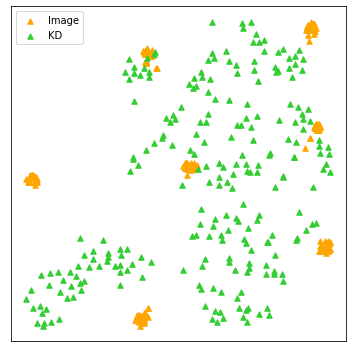

In [14]:
colors = ['orange', 'limegreen']
labels = ['KD', 'Image']

fig, ax= plt.subplots(figsize=(5, 5))

ax.scatter(X_tsne_image[:, 0], X_tsne_image[:, 1], marker='^', c=colors[0],
            s=15*2, label='{}'.format(labels[1]))

ax.scatter(X_tsne_kd[:, 0], X_tsne_kd[:, 1], marker='^', c=colors[1],
            s=15*2, label='{}'.format(labels[0]))

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_xticks([])
ax.set_yticks([])
ax.legend()
plt.tight_layout()
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/kd_image_tsne.pdf', format='pdf', bbox_inches="tight")